<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 03 de Data Science

# Regressão Não Linear de Box-Cox
Tempo estimado: **60** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Criar um modelo de regressão não linear de Box-Cox
* Avaliar as estatísticas do modelo
* Avaliar os erros

## Bibliotecas

In [2]:
# importando a biblioteca pandas para manipulação de dados
import pandas as pd

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# O módulo "stats" da biblioteca SciPy é responsável por fornecer funções para análise estatística
from scipy import stats 

# O módulo "statsmodels.formula.api" da biblioteca StatsModels fornece um conjunto de classes e funções que permitem a modelagem estatística usando fórmulas estatísticas
import statsmodels.formula.api as smf 
import statsmodels.api as sm 

#Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

# O método "stepwise" é uma técnica comum usada em modelagem de regressão para selecionar variáveis ​​explicativas relevantes que devem ser incluídas no modelo.
from statstests.process import stepwise

# Importando a biblioteca math que fornece funções matemáticas básicas
import math 

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns
# Teste estatístico shapiro francia para amostras n>30
from statstests.tests import shapiro_francia

## Obtendo dados

In [3]:
caminho = "" 

# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/dev/Data/MeuAutoLimpo.csv" 

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho) 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
# Renomeando as colunas trocando traços por underline
df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
# visualizando as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [6]:
# Criando uma lista com todas as variáveis
variaveis_independentes = list(df.select_dtypes(include='number').columns)
variaveis = variaveis_independentes.copy()

# Criando uma lista com todas as variaveis independentes
variaveis_independentes.remove('price')

# Printando os itens da lista
print(variaveis_independentes)


['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']


In [7]:
# Criando um dataframe para realizar as análises
df_box_cox = df[variaveis].copy(deep=True)
df_box_cox.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


## Box-Cox

* A normalização de Box-Cox é uma técnica estatística utilizada para transformar dados que não apresentam uma distribuição normal em dados que seguem uma distribuição normal. 
* Essa transformação é útil em muitas áreas da análise de dados, incluindo modelagem estatística, análise de séries temporais e análise de dados financeiros.

$   X   : Variável \ independente \\
    Y   : Variável \ dependente \\
    \lambda : Parâmetro \ de \ Box-Cox \\
    Y_{bc}  : Variável \ dependente \ de \ Box-Cox \ normalizada \ onde: \\
    Y_{bc} = \begin{cases}
    \dfrac{(Y^\lambda - 1)}{\lambda}, &  \text{se }\lambda \neq 0 \\
    \ln(Y), & \text{se }\lambda = 0
    \end{cases}$


### Implementando

In [8]:
# Obtendo os valores transformados
Y_bc, lmbda = boxcox(df_box_cox['price'])

#Inserindo a variável transformada ('bc_preco') no dataset
#para a estimação de um novo modelo
df_box_cox['bc_price'] = Y_bc

df_box_cox.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,bc_price
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.584457
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1.584931
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1.584931
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1.584539
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1.585053


In [9]:
# Criando uma formula pegando as colunas do dataframe
formula_var_independentes = ' + '.join(variaveis_independentes)
# Criando a formula completa
formula_modelo = "bc_price ~ " + formula_var_independentes
# Printando a formula completa
print(formula_modelo)

bc_price ~ symboling + normalized_losses + wheel_base + length + width + height + curb_weight + engine_size + bore + stroke + compression_ratio + horsepower + peak_rpm + city_mpg + highway_mpg


In [10]:
# Criando o modelo da regressão
modelo = sm.OLS.from_formula(formula_modelo,df_box_cox).fit()

# Verificando as estatísticas do modelo
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bc_price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     94.67
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           3.04e-78
Time:                        02:28:50   Log-Likelihood:                 1264.4
No. Observations:                 201   AIC:                            -2497.
Df Residuals:                     185   BIC:                            -2444.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.5736      0.002    647.978      0.000       1.569       1.578
symboling         -7.491e-06   3.96e-05     -0.189      0.850   -8.57e-05    7.07e-05
normalized_losses  2.419e-06   1.32e-06      1.828      0.069   -1.92e-07    5.03e-06
wheel_base        -8.837e-06   1.63e-05     -0.543      0.588    -4.1e-05    2.33e-05
length             1.163e-05   8.35e-06      1.392      0.166   -4.85e-06    2.81e-05
width              6.537e-05   3.85e-05      1.698      0.091   -1.06e-05       0.000
height             2.632e-05   2.15e-05      1.224      0.222   -1.61e-05    6.87e-05
curb_weight        7.206e-07   2.58e-07      2.795      0.006    2.12e-07    1.23e-06
engine_size       -3.361e-07   2.13e-06     -0.157      0.875   -4.55e-06    3.87e-06
bore                  0.0001      0.000      0.802      0.424      -0.000       0.001
stroke               -0.0001      0.000     -1.119      0.264      -0.000    9.77e-05
compression_ratio  6.724e-05   1.23e-05      5.462      0.000    4.29e-05    9.15e-05
horsepower         1.067e-05   2.65e-06      4.020      0.000    5.43e-06    1.59e-05
peak_rpm           9.297e-08      1e-07      0.929      0.354   -1.04e-07     2.9e-07
city_mpg             -0.0001   2.71e-05     -4.282      0.000      -0.000   -6.25e-05
highway_mpg        5.987e-05   2.44e-05      2.453      0.015    1.17e-05       0.000
==============================================================================
Omnibus:                        1.562   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.458   Jarque-Bera (JB):                1.197
Skew:                           0.141   Prob(JB):                        0.550
Kurtosis:                       3.251   Cond. No.                     4.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
# Realizando o método stepwise
modelo_step = stepwise(modelo,pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 bc_price ~ Q('symboling') + Q('normalized_losses') + Q('wheel_base') + Q('length') + Q('width') + Q('height') + Q('curb_weight') + Q('engine_size') + Q('bore') + Q('stroke') + Q('compression_ratio') + Q('horsepower') + Q('peak_rpm') + Q('city_mpg') + Q('highway_mpg')

 Discarding atribute "Q('engine_size')" with p-value equal to 0.8750279323819563 

Estimating model...: 
 bc_price ~ Q('symboling') + Q('normalized_losses') + Q('wheel_base') + Q('length') + Q('width') + Q('height') + Q('curb_weight') + Q('bore') + Q('stroke') + Q('compression_ratio') + Q('horsepower') + Q('peak_rpm') + Q('city_mpg') + Q('highway_mpg')

 Discarding atribute "Q('symboling')" with p-value equal to 0.8497089512715342 

Estimating model...: 
 bc_price ~ Q('normalized_losses') + Q('wheel_base') + Q('length') + Q('width') + Q('height') + Q('curb_weight') + Q('bore') + Q('stroke') + Q('compression_ratio') + Q('horsepower') + Q('peak_rpm') + Q('city_mpg') + Q('highway

In [12]:
# Avaliando as estatística do modelo após o procedimento de stepwise
modelo_step.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               bc_price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     233.4
Date:                Thu, 06 Apr 2023   Prob (F-statistic):           6.84e-86
Time:                        02:28:51   Log-Likelihood:                 1258.9
No. Observations:                 201   AIC:                            -2504.
Df Residuals:                     194   BIC:                            -2481.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.5785      0.001   1577.356      0.000       1.577       1.580
Q('length')             1.719e-05   6.15e-06      2.797      0.006    5.07e-06    2.93e-05
Q('curb_weight')        7.021e-07   2.13e-07      3.302      0.001    2.83e-07    1.12e-06
Q('compression_ratio')  6.855e-05   1.18e-05      5.816      0.000    4.53e-05    9.18e-05
Q('horsepower')         1.098e-05   1.87e-06      5.875      0.000    7.29e-06    1.47e-05
Q('city_mpg')             -0.0001   2.49e-05     -4.954      0.000      -0.000   -7.43e-05
Q('highway_mpg')        5.918e-05   2.34e-05      2.528      0.012     1.3e-05       0.000
==============================================================================
Omnibus:                        1.914   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.384   Jarque-Bera (JB):                1.559
Skew:                           0.133   Prob(JB):                        0.459
Kurtosis:                       3.340   Cond. No.                     7.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Realizando o teste de shapiro francia para verificar a aderência dos resíduos a normalidadeshapiro_francia(modelo_step.resid)
teste_sf = shapiro_francia(modelo_step.resid) 
teste_sf = teste_sf.items() 
method, statistics_W, statistics_z, p = teste_sf 
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9911635721840961
statistics z  :  0.761119771470219
p-value  :  0.22329276607985754
Statistics W=0.99116, p-value=0.223293
Não se rejeita H0 - Distribuição aderente à normalidade


In [14]:
#Obtendo os valores preditos
df_box_cox['YHat_bc'] = modelo.predict()
#Realizando a transformação
df_box_cox['YHat'] = (df_box_cox['YHat_bc'] * lmbda + 1)** (1 / lmbda)
df_box_cox['Y'] = (df_box_cox['bc_price'] * lmbda + 1)** (1 / lmbda)
# Printando as linhas iniciais
df_box_cox.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,bc_price,YHat_bc,YHat,Y
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1.584457,1.583932,11087.840400,13495.0
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1.584931,1.583932,11087.840400,16500.0
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,1.584931,1.584816,15676.176616,16500.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1.584539,1.583887,10913.346924,13950.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1.585053,1.584466,13540.808680,17450.0


### Cálculo dos Erros

Text(1.58, 120, 'SCORE: 0.884739')

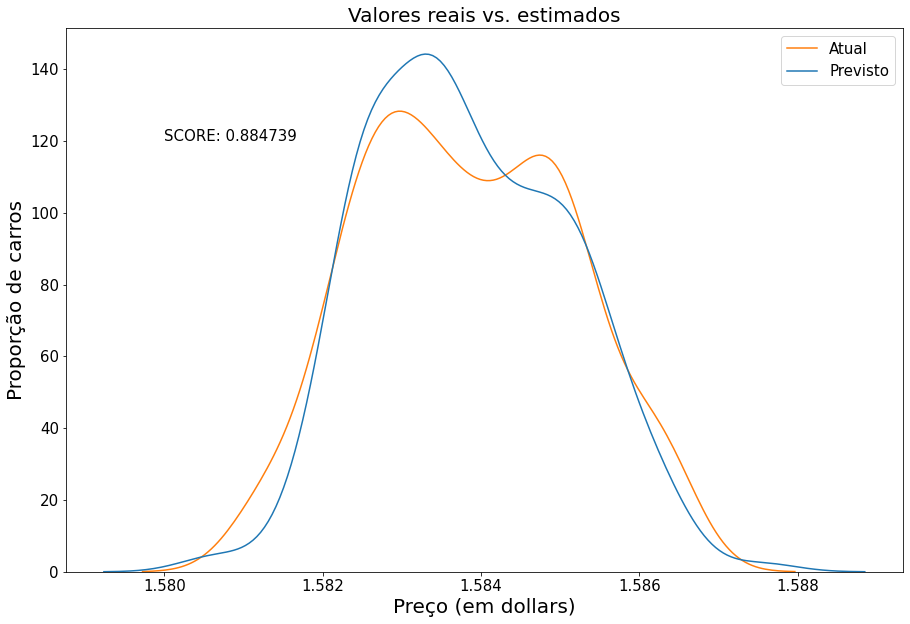

In [24]:
#Criando a área do gráfico
plt.figure(figsize=(15, 10))

# Definindo um gráfico densidade
sns.kdeplot(data = df_box_cox[['YHat_bc','bc_price']])

#Definindo os textos de titulo eixos e legenda
plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15) 
plt.legend(labels=["Atual","Previsto"], fontsize = 15, bbox_to_anchor=(1, 1))

# R2 do modelo
R2 =score = modelo.rsquared

tt = "SCORE: %4f" % R2

#plotando o texto no gráfico
plt.text(1.580, 120, tt, size = 15)

Text(0.5, 0, 'Resíduo (em dollars)')

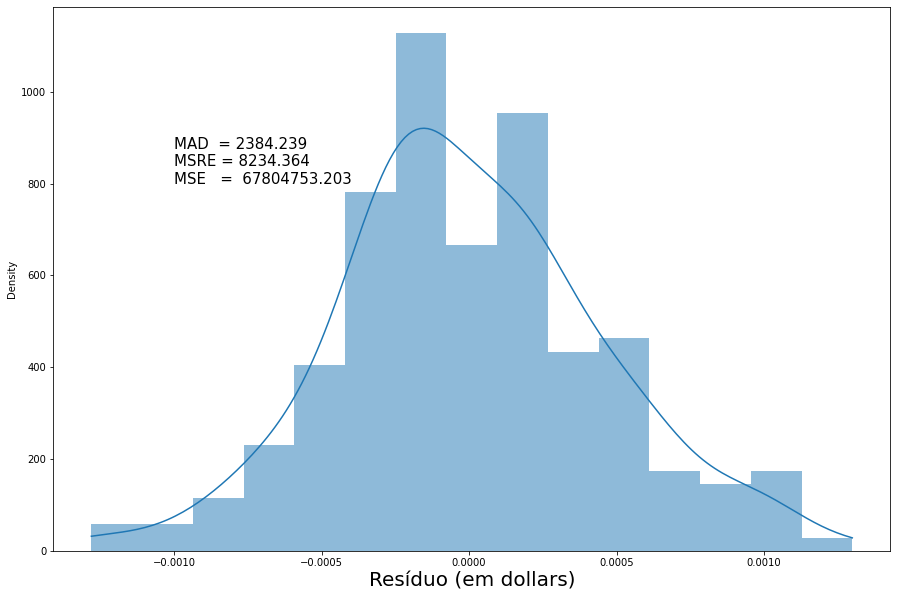

In [22]:
# Erro
df_box_cox.loc[:,'Deviation'] = df_box_cox['bc_price']-df_box_cox['YHat_bc']

# Erro absoluto
df_box_cox.loc[:,'AbsDeviation'] = abs(df_box_cox['YHat']-df_box_cox['price'])

# Quadrado do erro absolulto
df_box_cox.loc[:,'SquaredError'] = (df_box_cox['price']-df_box_cox['YHat'])**2

#Mean Absolute Desviation - Erro absoluto médio
MAD = df_box_cox['AbsDeviation'].mean()

#Mean Squared Error - Erro quadrado médio
MSE = df_box_cox['SquaredError'].mean()

#Mean Squared Root Error = Raiz do erro quadrado médio
MSRE = math.sqrt(MSE)

plt.figure(figsize=(15, 10))

tt = "MAD  = %.3f \nMSRE = %.3f \nMSE   =  %.3f" % (MAD, MSRE, MSE)

sns.histplot(x=df_box_cox['Deviation'], kde=True, stat="density", linewidth=0)
plt.text(-0.0010, 800, tt, size=15, color = "black")
plt.xlabel('Resíduo (em dollars)', size = 20)

In [170]:
df_box_cox.head(20)

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,highway_mpg,price,bc_price,YHat_bc,YHat,Y,Deviation,DeviationModelo,AbsDeviation,SquaredError
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,27,13495.0,1.584457,1.583932,11087.840400,13495.0,-2407.159600,0.000428,2407.159600,5.794417e+06
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,27,16500.0,1.584931,1.583932,11087.840400,16500.0,-5412.159600,0.000902,5412.159600,2.929147e+07
2,1,164,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,26,16500.0,1.584931,1.584816,15676.176616,16500.0,-823.823384,0.000008,823.823384,6.786850e+05
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,30,13950.0,1.584539,1.583887,10913.346924,13950.0,-3036.653076,0.000747,3036.653076,9.221262e+06
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,22,17450.0,1.585053,1.584466,13540.808680,17450.0,-3909.191320,0.000646,3909.191320,1.528178e+07
5,2,122,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,25,15250.0,1.584753,1.584146,11977.745098,15250.0,-3272.254902,0.000523,3272.254902,1.070765e+07
6,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,...,25,17710.0,1.585084,1.585011,17114.915426,17710.0,-595.084574,0.000353,595.084574,3.541257e+05
7,1,122,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,...,25,18920.0,1.585221,1.585003,17053.135627,18920.0,-1866.864373,0.000413,1866.864373,3.485183e+06
8,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,20,23875.0,1.585661,1.585423,20961.816365,23875.0,-2913.183635,0.000493,2913.183635,8.486639e+06
9,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,...,29,16430.0,1.584922,1.584009,11396.669214,16430.0,-5033.330786,0.001115,5033.330786,2.533442e+07


## Fazendo a previsão do custo do fuscão

In [38]:
fuscao = '..\Data\Auto_pronto_fuscao.csv'
df_fuscao = pd.read_csv(fuscao)
df_fuscao.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,twelve,two.1,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,122.0,94.5,160.6,60.6,59.1,1850,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df_fuscao.rename(columns=lambda x: x.replace('-', '_'), inplace=True)
df_fuscao = df_fuscao[['length','curb_weight','compression_ratio','horsepower','city_mpg','highway_mpg']]
df_fuscao.head()

,length,curb_weight,compression_ratio,horsepower,city_mpg,highway_mpg
0,160.6,1850,9.0,53,21,27


In [40]:
preco_fuscao = modelo_step.predict(df_fuscao)
preco_fuscao=(preco_fuscao * lmbda + 1)** (1 / lmbda)
print('O preço do fusção é :', preco_fuscao)

O preço do fusção é : 0    7687.451286
dtype: float64


In [42]:
modelo_step.params

Intercept                 1.578497e+00
Q('length')               1.719491e-05
Q('curb_weight')          7.021235e-07
Q('compression_ratio')    6.855048e-05
Q('horsepower')           1.098058e-05
Q('city_mpg')            -1.234938e-04
Q('highway_mpg')          5.918157e-05
dtype: float64

In [53]:
preco_teste = modelo_step.params[0] 
preco_teste += modelo_step.params[1]*df_fuscao.loc[0,'length']
preco_teste += modelo_step.params[2]*df_fuscao.loc[0,'curb_weight']
preco_teste += modelo_step.params[3]*df_fuscao.loc[0,'compression_ratio']
preco_teste += modelo_step.params[4]*df_fuscao.loc[0,'horsepower']
preco_teste += modelo_step.params[5]*df_fuscao.loc[0,'city_mpg']
preco_teste += modelo_step.params[6]*df_fuscao.loc[0,'highway_mpg']
preco_teste = (preco_teste * lmbda + 1)** (1 / lmbda)
print('preço teste = ', preco_teste)

preço teste =  7687.451286005266


## Referências:

Capítulo 12 do livro: FÁVERO, Luiz Paulo; BELFIORE, Patrícia. `Manual de análise de dados: estatística e modelagem multivariada com Excel®, SPSS® e Stata®`. Elsevier Brasil, 2017.

Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>

Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>

Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>

Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>